# Numpy 
Numpy is a powerful Python module that should be in the toolbelt of any AI/Deep learning practitioner. It provides functions and data strutctures that allow fast, efficient manipulation of mathematical structures like matrices and vectors. It represents these structures internally using Numpy arrays, which are like Python Lists, but highly optimised for calculations on large amounts of numerical data. Let's import this module now.

In [1]:
import math
import numpy as np

## Array creation
Numpy arrays can be created in a few different ways. Common ones are:
1. Instantiated using values from a normal Python list
2. Filled with sequential values upto a target number
3. Filled with random values (various random distributions available) - see https://numpy.org/doc/stable/reference/random/index.html


In [2]:
#Array creation from python list
python_list = [2, 4, 8, 16, 32, 64, 128]
A = np.array(python_list)  
print(A)

[  2   4   8  16  32  64 128]


In [3]:
#Array creation with sequential values 
N = 10
A = np.arange(N)
print(A)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
#Array creation with random values 
A = np.random.rand(N)  # returns an array filled with N random floats between 0 and 1
print(A)

[0.31544911 0.55621789 0.4960114  0.26757188 0.27898465 0.10269462
 0.44059926 0.50320215 0.15365804 0.64097359]


## Reshaping arrays

One of the many things that set Numpy arrays apart from Python lists is their `reshape` method. This allows you to define the number of dimensions that the structure represented by the array has. For example, the array `A` that we have just defined is just a flat list of numbers at the moment. `reshape` helps us represent it as a 2D data structure (a matrix). Keep in mind that the shape that you put into this method must agree with the number of elements in the array. In our example, the array has 10 elements, so acceptable shapes include:
* 5, 2
* 2, 5
* 1, 10
* 10, 1

In [5]:
A = A.reshape(5,2)
print(A)
print(f"A shape: {A.shape}")

[[0.31544911 0.55621789]
 [0.4960114  0.26757188]
 [0.27898465 0.10269462]
 [0.44059926 0.50320215]
 [0.15365804 0.64097359]]
A shape: (5, 2)


In [6]:
B = np.arange(2*N)
print(B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [7]:
B = B.reshape(2,10)
print(B)
print(f"B shape: {B.shape}")

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
B shape: (2, 10)


# Array operations
Once you have created an array, there are various operations you may want to perform on them. We'll go through some of the most common ones in the next few cells.

## Binary operators
Similar to normal counting numbers, Numpy arrays can be used as arguments to binary arithmetic operators like `*` (multiplication), `+` (addition), `-`(subtraction) and `/`(division).  
However, these can only be applied to arrays under certain conditions:
1. The arrays have the same shape, OR
2. The operation is between an array and a scalar, OR
3. The operations is between 2 arrays of different shapes that can be "broadcast" together - more on this later

These operations are applied **element-wise** meaning each element in the array is combined with its corresponding element at the same position in the other array

In [8]:
# Addition with a scalar
A1 = np.arange(N).reshape(A.shape)
C = 11 + A 
print(C)

[[11.31544911 11.55621789]
 [11.4960114  11.26757188]
 [11.27898465 11.10269462]
 [11.44059926 11.50320215]
 [11.15365804 11.64097359]]


In [9]:
# Subtraction with another array of same shape
C = A1 - A 
print(C)

[[-0.31544911  0.44378211]
 [ 1.5039886   2.73242812]
 [ 3.72101535  4.89730538]
 [ 5.55940074  6.49679785]
 [ 7.84634196  8.35902641]]


In [10]:
# Multiplication with another array of same shape
C = A1 * A 
print(C)

[[0.         0.55621789]
 [0.99202281 0.80271565]
 [1.1159386  0.51347309]
 [2.64359557 3.52241507]
 [1.22926431 5.76876227]]


In [11]:
# Division by a scalar
C = 11 / A 
print(C)

[[ 34.87091798  19.77642249]
 [ 22.1769095   41.11044795]
 [ 39.42869245 107.11369427]
 [ 24.96599737  21.86000186]
 [ 71.5875334   17.16139363]]


## Broadcasting
As long as an array's dimensions are compatible with their counterparts in the other array, they can be "broadcasted" together. This means that numpy will 'strectch' the smaller dimension along its axis so that element-wise operations can be applied between them. In general, 2 arrays can be broadcast together if each dimension in one array is compatible with its counterpart in the other array. Dimensions are compatible if they are equal or one of them is equal to 1. The dimension of size 1 is expanded to fit the size of its counterpart [https://numpy.org/doc/stable/user/basics.broadcasting.html]

In [12]:

A2 = np.arange(5).reshape(5,1)
print(A2, A2.shape)  

# A2 has shape (5, 1) so it can be broadcast to shape (5, 2) along A's horizontal axis
# it's as if A2 has been copied along the horizontal axis so that it can be added to A
D = A + A2
print(D, D.shape)

[[0]
 [1]
 [2]
 [3]
 [4]] (5, 1)
[[0.31544911 0.55621789]
 [1.4960114  1.26757188]
 [2.27898465 2.10269462]
 [3.44059926 3.50320215]
 [4.15365804 4.64097359]] (5, 2)


In [13]:
# Similarly, we can also broadcast an array of shape (1, 2) along A's vertical axis
A3 = np.arange(2).reshape(1,2)
print(A3, A3.shape)

E = A * A3
print(E, E.shape)




[[0 1]] (1, 2)
[[0.         0.55621789]
 [0.         0.26757188]
 [0.         0.10269462]
 [0.         0.50320215]
 [0.         0.64097359]] (5, 2)


## Array products
Contrary to the `*` operator, which performs element-wise multiplication between the arrays, `np.dot` and `np.matmul` are the dot and matrix products, respectively, of the arrays.

In [14]:
# The @ operator is always equivalent to np.matmul. When working with 2D arrays, np.matmul and np.dot are equivalent. We can show this:
F_1 = A @ B
F_2 = np.matmul(A, B)
F_3 = np.dot(A, B)
print(F_1)
print(f"F_1 shape: {F_1.shape}")
print(f"F_1, F_2 and F_3 are { '' if np.array_equal(F_1, F_2) and np.array_equal(F_2, F_3) else 'not' } equal!")

[[ 5.56217891  6.4338459   7.3055129   8.1771799   9.0488469   9.9205139
  10.7921809  11.6638479  12.5355149  13.4071819 ]
 [ 2.67571884  3.43930212  4.20288541  4.9664687   5.73005199  6.49363527
   7.25721856  8.02080185  8.78438513  9.54796842]
 [ 1.02694619  1.40862546  1.79030473  2.171984    2.55366327  2.93534254
   3.31702181  3.69870108  4.08038035  4.46205962]
 [ 5.03202153  5.97582294  6.91962436  7.86342577  8.80722719  9.7510286
  10.69483002 11.63863143 12.58243285 13.52623426]
 [ 6.40973585  7.20436747  7.9989991   8.79363072  9.58826235 10.38289397
  11.17752559 11.97215722 12.76678884 13.56142047]]
F_1 shape: (5, 10)
F_1, F_2 and F_3 are  equal!


# Functions
Another useful thing we might want to do with an array is to apply a function to each element.
Generally speaking, it is best to use the built-in Numpy functions to work on numpy arrays instead of defining your own. This is because Numpy functions are highly optimised for speed,  
which is important when working with large amounts of data. Chances are, whatever kind of mathematical operation you want to perform on a Numpy array is already built in. See below for a full list:  
https://numpy.org/doc/stable/reference/routines.math.html  

## Element-wise functions
Common uses are applying trig functions to an array of values:

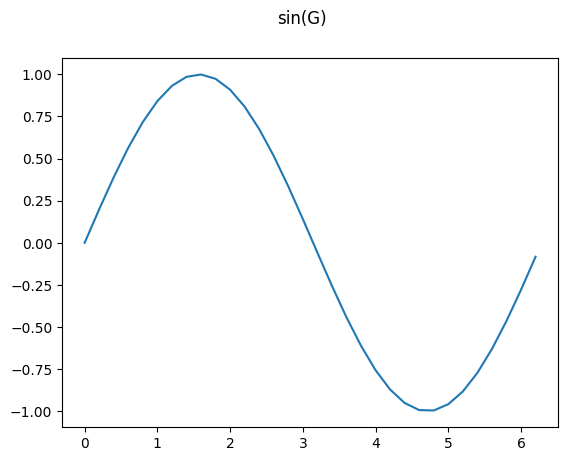

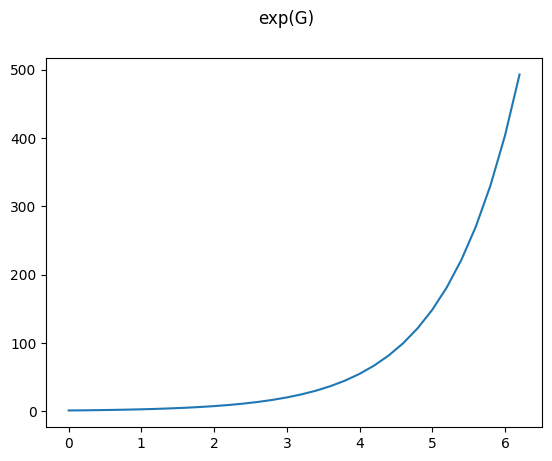

In [15]:
import matplotlib.pyplot as plt

# Element-wise functions: 
G = np.arange(0, 2*np.pi, 0.2)
H = np.sin(G)
plt.plot(G, H)
plt.suptitle("sin(G)")
plt.show()

H_1 = np.exp(G)
plt.plot(G, H_1)
plt.suptitle("exp(G)")
plt.show()


## Reduce functions
These are applied along the selected axis, consume all the elements and reduce the axis down to 1 element.  
If no axis is specified, the function is applied to the whole array, and reduces it to a scalar

In [16]:
print(A)

I = A.max()
print(f"Maximum value in A: \n{I}")

I_2 = np.mean(A, axis=0, keepdims=True)  # keepdims is needed to preserve the original shape of the axis
print(f"Average of each column in A: \n{I_2}")

I_3 = A.min(axis=1, keepdims=True) 
print(f"Minimum value in each row in A: \n{I_3}")


[[0.31544911 0.55621789]
 [0.4960114  0.26757188]
 [0.27898465 0.10269462]
 [0.44059926 0.50320215]
 [0.15365804 0.64097359]]
Maximum value in A: 
0.6409735850305432
Average of each column in A: 
[[0.33694049 0.41413203]]
Minimum value in each row in A: 
[[0.31544911]
 [0.26757188]
 [0.10269462]
 [0.44059926]
 [0.15365804]]


# Practical example

Putting everything together for a practical example, and visulalise the output of some Numpy operations

In [17]:
# Defining some helper functions
def plot_point(point):
    plt.rcParams["figure.figsize"] = [3.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = point[0]
    y = point[1]
    
    lims = 3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlim(-lims, lims)
    plt.ylim(-lims, lims)
    plt.grid()
    ax.plot(x, y, marker="o", markersize=7, markeredgecolor="black", markerfacecolor="red")
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()



# This function returns an np array that describes a 2d rotation 
# matrix [https://www1.udel.edu/biology/rosewc/kaap686/notes/matrices_rotations.pdf]. 
# These kinds of structures are often used in computer graphics to rotate and translate points in space
def get_rot_clockwise_matrix(angle):
    return np.array([
        [ math.cos(angle), math.sin(angle)],
        [-math.sin(angle), math.cos(angle)]
    ])

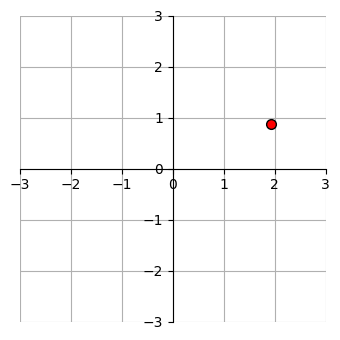

In [18]:
# Define a 2d point p to be a numpy array that holds the co-ordinates 1, 1
N = 2
p = np.random.rand(2) # random 2-element array
p = 2 * p              # scale array using scalar multiplication
p = p.reshape(2, 1)    # reshape it into a 2x1 matrix
plot_point(p)

104.95670905009982


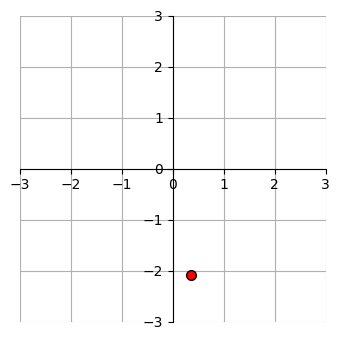

In [19]:
# Define maximum and minimum rotation angles in radians - there are 360 degrees in 2*pi radians
min_angle = math.pi/2 # 90 degrees
max_angle = math.pi   # 180 degrees

angle = np.random.uniform(min_angle, max_angle) # get a random angle between the two we just defined
print(angle * 180 / math.pi) # print the angle in degrees so we can see if it's roughly correct
# Get the matrix (numpy array) for a clockwise rotation
rot90 = get_rot_clockwise_matrix(angle)

# Perform the multiplication and plot!
p = rot90 @ p
plot_point(p)


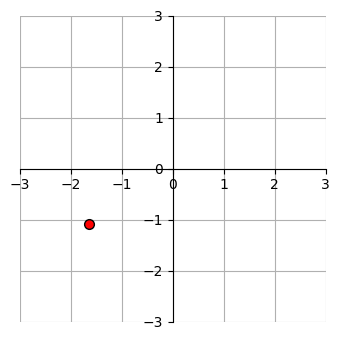

In [20]:
# Translate the position by some arbitrary amount

translation = np.array([-2, 1]).reshape(2, 1)
p = p + translation # transpose the array so it can be broadcast to the point array's shape

plot_point(p)